# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={"metric"}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | st. john's
Processing Record 2 of Set 1 | ribeira brava
Processing Record 3 of Set 1 | moose jaw
Processing Record 4 of Set 1 | bhawanipatna
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | ebon
Processing Record 7 of Set 1 | gardendale
Processing Record 8 of Set 1 | vilyuchinsk
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | zeya
Processing Record 14 of Set 1 | mersa matruh
Processing Record 15 of Set 1 | saipan
Processing Record 16 of Set 1 | frenda
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | mejit
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | adamstown
Pro

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,st. john's,47.5649,-52.7093,2.66,76,100,12.86,CA,1731248894
1,ribeira brava,32.6500,-17.0667,28.96,32,74,5.71,PT,1731249076
2,moose jaw,50.4001,-105.5344,2.14,93,100,6.17,CA,1731249077
3,bhawanipatna,19.9000,83.1667,21.62,69,2,1.32,IN,1731249078
4,bethel,41.3712,-73.4140,7.31,66,100,0.89,US,1731249080


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,2.66,76,100,12.86,CA,1731248894
1,ribeira brava,32.6500,-17.0667,28.96,32,74,5.71,PT,1731249076
2,moose jaw,50.4001,-105.5344,2.14,93,100,6.17,CA,1731249077
3,bhawanipatna,19.9000,83.1667,21.62,69,2,1.32,IN,1731249078
4,bethel,41.3712,-73.4140,7.31,66,100,0.89,US,1731249080


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

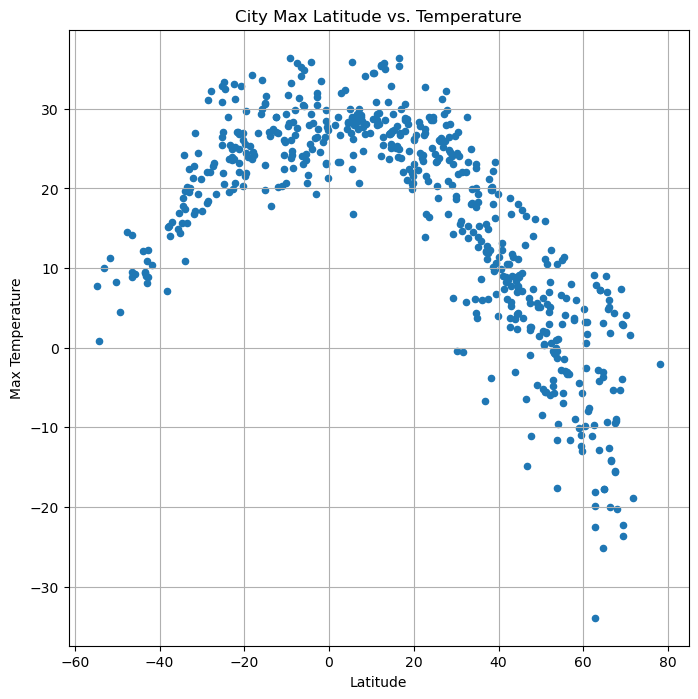

In [15]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x="Lat", y="Max Temp", grid=True, figsize=(8, 8), 
                  title='City Max Latitude vs. Temperature')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

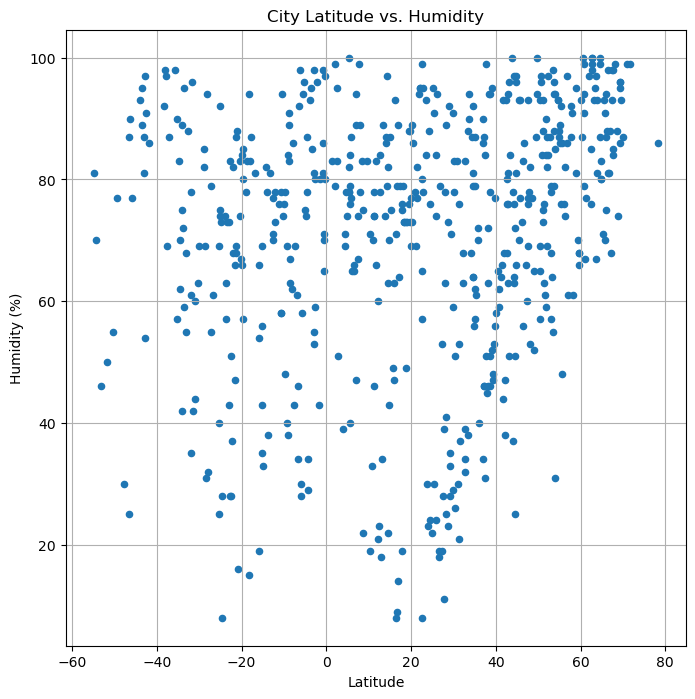

In [16]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x="Lat", y="Humidity", grid=True, figsize=(8, 8), 
                  title='City Latitude vs. Humidity')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

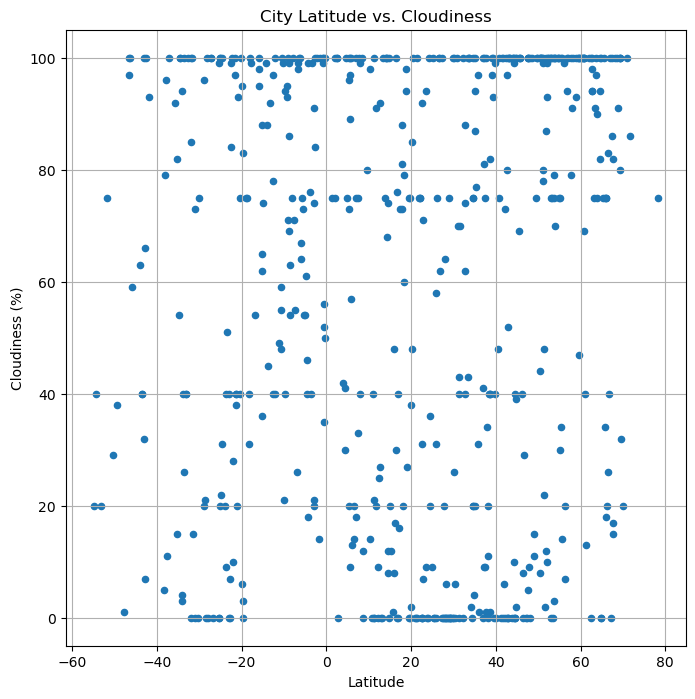

In [17]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x="Lat", y="Cloudiness", grid=True, figsize=(8, 8), 
                  title='City Latitude vs. Cloudiness')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

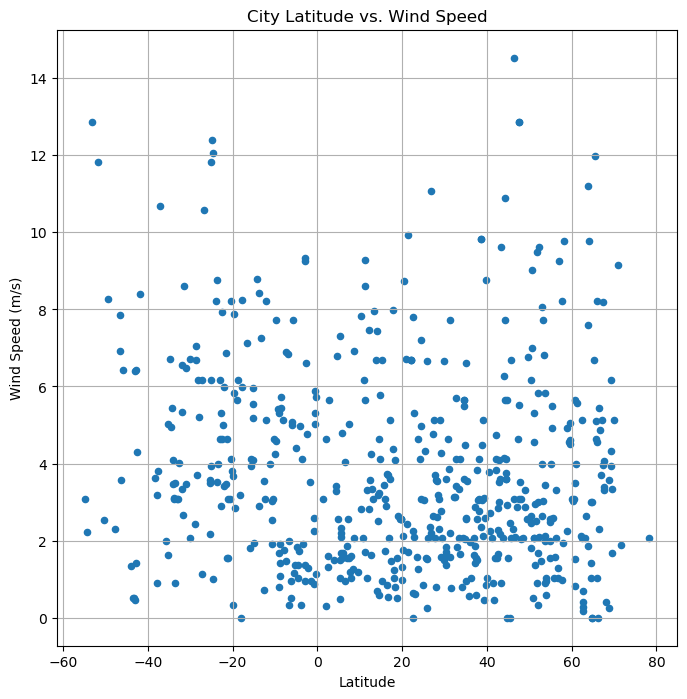

In [18]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x="Lat", y="Wind Speed", grid=True, figsize=(8, 8), 
                  title='City Latitude vs. Wind Speed')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,2.66,76,100,12.86,CA,1731248894
1,ribeira brava,32.6500,-17.0667,28.96,32,74,5.71,PT,1731249076
2,moose jaw,50.4001,-105.5344,2.14,93,100,6.17,CA,1731249077
3,bhawanipatna,19.9000,83.1667,21.62,69,2,1.32,IN,1731249078
4,bethel,41.3712,-73.4140,7.31,66,100,0.89,US,1731249080


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
8,port-aux-francais,-49.3500,70.2167,4.52,77,38,8.28,TF,1731249084
9,west island,-12.1568,96.8225,26.99,78,100,8.23,CC,1731249086
10,edinburgh of the seven seas,-37.0676,-12.3116,15.81,87,100,10.68,SH,1731249088
11,invercargill,-46.4000,168.3500,9.45,90,100,3.58,NZ,1731249090
16,port mathurin,-19.6833,63.4167,24.49,80,83,7.88,MU,1731249097


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is 0.7521589304312216


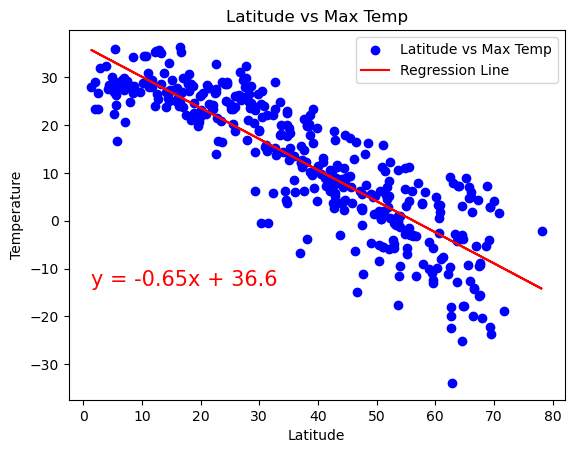

In [49]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, color='blue', label="Latitude vs Max Temp")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Max Temp")
print(f"The r-squared value is {r_value**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (x_values.min(), y_values.max() - 50), fontsize=15, color="red")
plt.legend()
plt.show()

The r-squared value is 0.5639538045219896


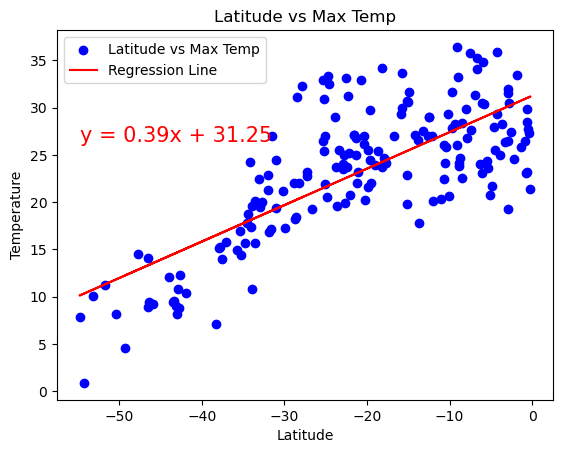

In [50]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, color='blue', label="Latitude vs Max Temp")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Max Temp")
print(f"The r-squared value is {r_value**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (x_values.min(), y_values.max() - 10), fontsize=15, color="red")
plt.legend()
plt.show()

**Discussion about the linear relationship:** There is a moderately strong positive correlation between latitude in the southern hemisphere and max temperature with an r sqaured value of .56 . There is a strong negative correlation between latitude in the northern hemisphere with an r squared value of .75. In the Nortern hemisphere the latitude starts at 0 and gets further away from the equator meaning temperatures will get cooler. In the southern hemisphere the data points start in the negative latitude meaning as they approach 0, they get closer to the equator and thus create a positive correlation. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is 0.09651051105759054


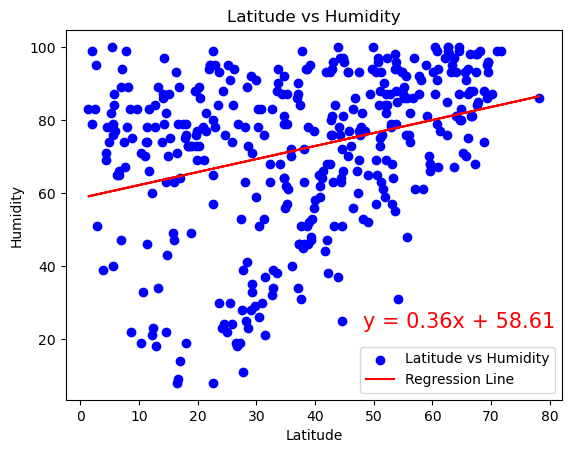

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, color='blue', label="Latitude vs Humidity")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
print(f"The r-squared value is {r_value**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (x_values.max() - 30, y_values.min() + 15), fontsize=15, color="red")
plt.legend()
plt.show()

The r-squared value is 0.00011781799152855963


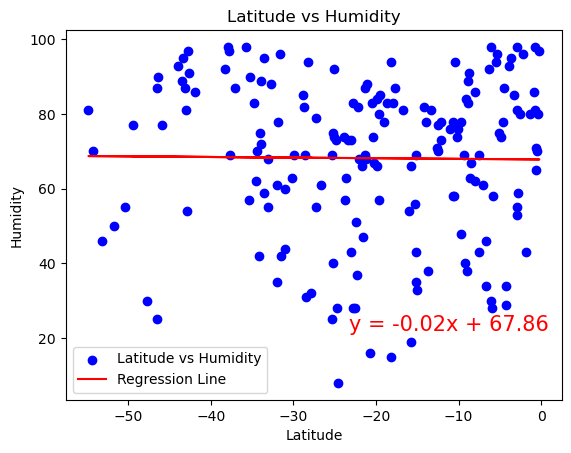

In [83]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, color='blue', label="Latitude vs Humidity")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
print(f"The r-squared value is {r_value**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (x_values.max() - 23, y_values.min() + 14), fontsize=15, color="red")
plt.legend()
plt.show()

**Discussion about the linear relationship:** There is little correlation between humidity and latitude. Both the northern and southern hemispheres have a pearson value lower than .10. This makes sense because latitude would not have much effect on how much wet or dry an area would be.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is 0.04840925232457013


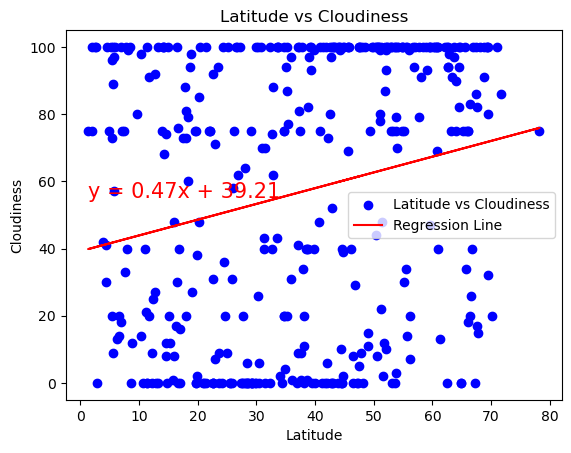

In [84]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, color='blue', label="Latitude vs Cloudiness")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
print(f"The r-squared value is {r_value**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (x_values.min(), y_values.max() - 45), fontsize=15, color="red")
plt.legend()
plt.show()

The r-squared value is 0.03819768696740089


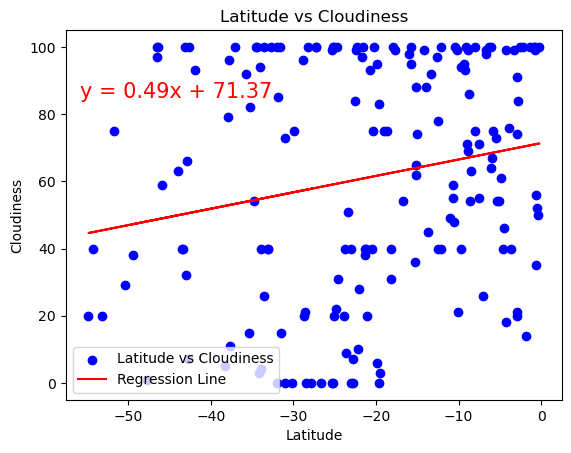

In [86]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, color='blue', label="Latitude vs Cloudiness")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
print(f"The r-squared value is {r_value**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (x_values.min()-1, y_values.max() - 15), fontsize=15, color="red")
plt.legend()
plt.show()

**Discussion about the linear relationship:** There is little to no correlation between Latitude and cloudiness. Both in the northern and southern hemisphere's there is an R squared score of less than .05. On both graphs, there are data points at numerous latitude points that are 100% cloudy and 0% cloudy as latitude does not effect the sky being clear or filled with clouds.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is 0.007041544509723318


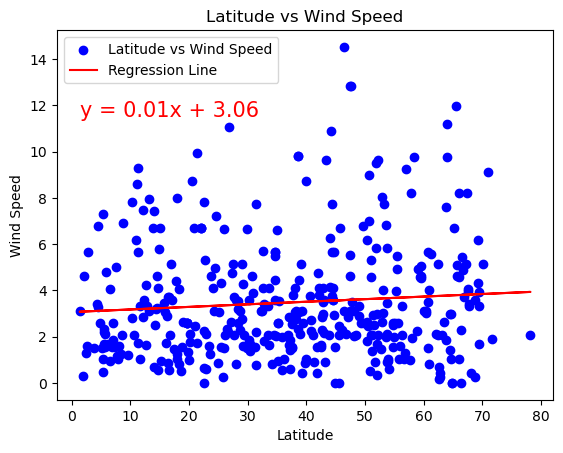

In [87]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, color='blue', label="Latitude vs Wind Speed")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
print(f"The r-squared value is {r_value**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (x_values.min(), y_values.max() - 3), fontsize=15, color="red")
plt.legend()
plt.show()

The r-squared value is 0.031014758707298782


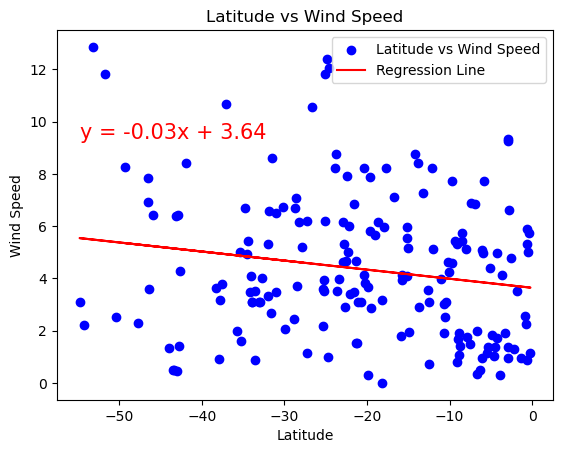

In [89]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, color='blue', label="Latitude vs Wind Speed")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
print(f"The r-squared value is {r_value**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (x_values.min(), y_values.max() - 3.5), fontsize=15, color="red")
plt.legend()
plt.show()

**Discussion about the linear relationship:** There is no correlation between latitude and wind speed. Both of the R squared values are less than .04. Unlike temperature, how north or south a city is has no effect on the wind speed. There does seem to be a wider spread of wind speeds in the southern hemisphere compared to the north where most wind speeds are at 4 mph or lower but not enough of a difference to have any meaningful correlation. 